In [520]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

### import target data

In [521]:
target_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/target.csv').drop(columns='Unnamed: 0')
target = target_raw.copy()

In [522]:
target

,zip_code,City,State,Time,zori_ssa,zori_ssa_diff
0,77494,Houston,TX,2014-01-01,1390.0,NaN
1,77449,Houston,TX,2014-01-01,1202.0,NaN
2,77084,Houston,TX,2014-01-01,1058.0,NaN
3,79936,El Paso,TX,2014-01-01,887.0,NaN
4,78130,San Antonio,TX,2014-01-01,1118.0,NaN
...,...,...,...,...,...,...
19560,76118,Dallas-Fort Worth,TX,2021-07-01,1737.0,197.0
19561,76247,Dallas-Fort Worth,TX,2021-07-01,1937.0,146.0
19562,78756,Austin,TX,2021-07-01,1547.0,-28.0
19563,78721,Austin,TX,2021-07-01,1807.0,345.0


In [523]:
target['Time'] = pd.to_datetime(target['Time'])

### import census data

In [524]:
df = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/acs_master11to18_clean.csv').drop(columns='Unnamed: 0')
df.zip_code = df.zip_code.astype(int)

### import shp files

In [525]:
# import US zip codes
# https://data.houstontx.gov/dataset/zip-codes-in-the-region/resource/bb634e26-cb64-44e4-8b86-3a37d113886b

zips = gpd.read_file('/Users/trevorban/Downloads/tl_2019_us_zcta510/tl_2019_us_zcta510.shp')

In [526]:
zips['GEOID10'] = zips['GEOID10'].astype(int)
zips = zips.rename(columns={'GEOID10': 'zip_code'})

### import target zipcodes

In [527]:
# read my file of target zipcodes

city_zip = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/city_zip.csv').drop(columns='Unnamed: 0')
city_zip.head()

,metro,zip
0,austin,78727
1,austin,78759
2,austin,78681
3,austin,78728
4,austin,78634


### Get geometry for city_zips from zips

In [528]:
zip_5 = zips[zips['zip_code'].isin(city_zip['zip'])]

In [529]:
# create lists of each city's zip codes
houston_zip = list(city_zip[city_zip['metro']=='houston']['zip'])
dfw_zip = list(city_zip[city_zip['metro']=='dfw']['zip'])
austin_zip = list(city_zip[city_zip['metro']=='austin']['zip'])
san_antonio_zip = list(city_zip[city_zip['metro']=='san_antonio']['zip'])
el_paso_zip = list(city_zip[city_zip['metro']=='el_paso']['zip'])

# Divide our zip_5 into each individual city
map_zip_houston = zip_5[zip_5['zip_code'].isin(houston_zip)]
map_zip_dfw = zip_5[zip_5['zip_code'].isin(dfw_zip)]
map_zip_austin = zip_5[zip_5['zip_code'].isin(austin_zip)]
map_zip_san_antonio = zip_5[zip_5['zip_code'].isin(san_antonio_zip)]
map_zip_el_paso = zip_5[zip_5['zip_code'].isin(el_paso_zip)]

### census data cleaning/feature engineering

In [530]:
df.shape

(20544, 39)

In [531]:
df.isna().any()

zip_code                                                       False
male_pop                                                       False
female_pop                                                     False
median_age                                                     False
white_pop                                                      False
not_us_citizen_pop                                             False
black_pop                                                      False
asian_pop                                                      False
hispanic_pop                                                   False
amerindian_pop                                                 False
other_race_pop                                                 False
median_income                                                  False
income_per_capita                                              False
pop_determined_poverty_status                                  False
poverty                           

In [532]:
# try dropping columms with nulls, though they seem very important
test = df.dropna(axis=1)

In [533]:
test

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,median_income,income_per_capita,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,occupied_housing_units,vacant_housing_units_for_rent,median_year_structure_built,married_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,commuters_by_public_transportation,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year,Time
0,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-01-01
1,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-02-01
2,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-03-01
3,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-04-01
4,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,79912,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0,570.0,37419.0,2376.0,40421.0,626.0,2018,2018-08-01
20540,79912,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0,570.0,37419.0,2376.0,40421.0,626.0,2018,2018-09-01
20541,79912,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0,570.0,37419.0,2376.0,40421.0,626.0,2018,2018-10-01
20542,79912,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0,570.0,37419.0,2376.0,40421.0,626.0,2018,2018-11-01


In [534]:
test['Time'] = pd.to_datetime(test['Time'])

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [535]:
test['total_pop'] = test.male_pop + test.female_pop

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [536]:
test.columns

Index(['zip_code', 'male_pop', 'female_pop', 'median_age', 'white_pop',
       'not_us_citizen_pop', 'black_pop', 'asian_pop', 'hispanic_pop',
       'amerindian_pop', 'other_race_pop', 'median_income',
       'income_per_capita', 'pop_determined_poverty_status', 'poverty',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'occupied_housing_units', 'vacant_housing_units_for_rent',
       'median_year_structure_built', 'married_households',
       'households_public_asst_or_food_stamps', 'male_male_households',
       'female_female_households', 'children', 'median_rent',
       'percent_income_spent_on_rent', 'owner_occupied_housing_units',
       'commuters_by_public_transportation', 'employed_pop', 'unemployed_pop',
       'pop_in_labor_force', 'armed_forces', 'year', 'Time', 'total_pop'],
      dtype='object')

In [537]:
test['male_pop_ratio'] = test.male_pop/test.total_pop
test['female_pop_ratio'] = test.female_pop/test.total_pop
test['white_pop_ratio'] = test.white_pop/test.total_pop
test['not_us_citizen_pop_ratio'] = test.not_us_citizen_pop/test.total_pop
test['black_pop_ratio'] = test.black_pop/test.total_pop
test['asian_pop_ratio'] = test.asian_pop/test.total_pop
test['hispanic_pop_ratio'] = test.hispanic_pop/test.total_pop
test['amerindian_pop_ratio'] = test.amerindian_pop/test.total_pop
test['other_race_pop_ratio'] = test.other_race_pop/test.total_pop
test['pop_determined_poverty_status_ratio'] = test.pop_determined_poverty_status/test.total_pop
test['children_ratio'] = test.children/test.total_pop
test['employed_pop_ratio'] = test.employed_pop/test.total_pop
test['unemployed_pop_ratio'] = test.unemployed_pop/test.total_pop
test['pop_in_labor_force_ratio'] = test.pop_in_labor_force/test.total_pop
test['armed_forces_ratio'] = test.armed_forces/test.total_pop

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [538]:
test.columns

Index(['zip_code', 'male_pop', 'female_pop', 'median_age', 'white_pop',
       'not_us_citizen_pop', 'black_pop', 'asian_pop', 'hispanic_pop',
       'amerindian_pop', 'other_race_pop', 'median_income',
       'income_per_capita', 'pop_determined_poverty_status', 'poverty',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'occupied_housing_units', 'vacant_housing_units_for_rent',
       'median_year_structure_built', 'married_households',
       'households_public_asst_or_food_stamps', 'male_male_households',
       'female_female_households', 'children', 'median_rent',
       'percent_income_spent_on_rent', 'owner_occupied_housing_units',
       'commuters_by_public_transportation', 'employed_pop', 'unemployed_pop',
       'pop_in_labor_force', 'armed_forces', 'year', 'Time', 'total_pop',
       'male_pop_ratio', 'female_pop_ratio', 'white_pop_ratio',
       'not_us_citizen_pop_ratio', 'black_pop_ratio', 'asian_pop_rati

In [539]:
test

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,median_income,income_per_capita,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,occupied_housing_units,vacant_housing_units_for_rent,median_year_structure_built,married_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,commuters_by_public_transportation,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year,Time,total_pop,male_pop_ratio,female_pop_ratio,white_pop_ratio,not_us_citizen_pop_ratio,black_pop_ratio,asian_pop_ratio,hispanic_pop_ratio,amerindian_pop_ratio,other_race_pop_ratio,pop_determined_poverty_status_ratio,children_ratio,employed_pop_ratio,unemployed_pop_ratio,pop_in_labor_force_ratio,armed_forces_ratio
0,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-01-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
1,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-02-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
2,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-03-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
3,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-04-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
4,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-05-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,79912,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0,570.0,37419.0,2376.0,40421.0,626.0,2018,2018-08-01,80264.0,0.486968,0.513032,0.223537,0.137982,0.018140,0.031832,0.704675,0.002940,0.001620,0.996188,0.260715,0.466199,0.029602,0.503601,0.007799
20540,79912,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0,570.0,37419.0,2376.0,40421.0,626.0,2018,2018-09-01,80264.0,0.486968,0.513032,0.223537,0.137982,0.018140,0.031832,0.704675,0.002940,0.001620,0.996188,0.260715,0.466199,0.029602,0.503601,0.007799
20541,79912,39086.0,41178.0,34.0,17942.0,11

In [540]:
target

,zip_code,City,State,Time,zori_ssa,zori_ssa_diff
0,77494,Houston,TX,2014-01-01,1390.0,NaN
1,77449,Houston,TX,2014-01-01,1202.0,NaN
2,77084,Houston,TX,2014-01-01,1058.0,NaN
3,79936,El Paso,TX,2014-01-01,887.0,NaN
4,78130,San Antonio,TX,2014-01-01,1118.0,NaN
...,...,...,...,...,...,...
19560,76118,Dallas-Fort Worth,TX,2021-07-01,1737.0,197.0
19561,76247,Dallas-Fort Worth,TX,2021-07-01,1937.0,146.0
19562,78756,Austin,TX,2021-07-01,1547.0,-28.0
19563,78721,Austin,TX,2021-07-01,1807.0,345.0


In [542]:
test

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,median_income,income_per_capita,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,occupied_housing_units,vacant_housing_units_for_rent,median_year_structure_built,married_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,commuters_by_public_transportation,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year,Time,total_pop,male_pop_ratio,female_pop_ratio,white_pop_ratio,not_us_citizen_pop_ratio,black_pop_ratio,asian_pop_ratio,hispanic_pop_ratio,amerindian_pop_ratio,other_race_pop_ratio,pop_determined_poverty_status_ratio,children_ratio,employed_pop_ratio,unemployed_pop_ratio,pop_in_labor_force_ratio,armed_forces_ratio
0,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-01-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
1,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-02-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
2,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-03-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
3,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-04-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
4,77494,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,52.0,120111.0,42344.0,55713.0,1421.0,0.3568,18581.0,1207.0,17440.0,160.0,2004.0,13615.0,253.0,46.0,41.0,19418.0,1005.0,28.1,15334.0,672.0,25437.0,1097.0,26534.0,0.0,2011,2011-05-01,55808.0,0.493209,0.506791,0.652057,0.118800,0.066603,0.123316,0.140697,0.000394,0.000932,0.998298,0.347943,0.455795,0.019657,0.475452,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,79912,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0,570.0,37419.0,2376.0,40421.0,626.0,2018,2018-08-01,80264.0,0.486968,0.513032,0.223537,0.137982,0.018140,0.031832,0.704675,0.002940,0.001620,0.996188,0.260715,0.466199,0.029602,0.503601,0.007799
20540,79912,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0,570.0,37419.0,2376.0,40421.0,626.0,2018,2018-09-01,80264.0,0.486968,0.513032,0.223537,0.137982,0.018140,0.031832,0.704675,0.002940,0.001620,0.996188,0.260715,0.466199,0.029602,0.503601,0.007799
20541,79912,39086.0,41178.0,34.0,17942.0,11

In [503]:
df = test.merge(target, how='outer', on=['zip_code', 'Time'])

In [504]:
df.head()

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,median_income,income_per_capita,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,occupied_housing_units,vacant_housing_units_for_rent,median_year_structure_built,married_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,commuters_by_public_transportation,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year,Time,total_pop,male_pop_ratio,female_pop_ratio,white_pop_ratio,not_us_citizen_pop_ratio,black_pop_ratio,asian_pop_ratio,hispanic_pop_ratio,amerindian_pop_ratio,other_race_pop_ratio,pop_determined_poverty_status_ratio,children_ratio,employed_pop_ratio,unemployed_pop_ratio,pop_in_labor_force_ratio,armed_forces_ratio,City,State,zori_ssa,zori_ssa_diff
0,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-01-01,79117.0,0.50098,0.49902,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.0011,0.995917,0.342303,0.452772,0.015799,0.468572,0.0,Houston,TX,1390.0,NaN
1,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-02-01,79117.0,0.50098,0.49902,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.0011,0.995917,0.342303,0.452772,0.015799,0.468572,0.0,Houston,TX,1387.0,329.0
2,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-03-01,79117.0,0.50098,0.49902,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.0011,0.995917,0.342303,0.452772,0.015799,0.468572,0.0,Houston,TX,1384.0,319.0
3,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-04-01,79117.0,0.50098,0.49902,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.0011,0.995917,0.342303,0.452772,0.015799,0.468572,0.0,Houston,TX,1381.0,310.0
4,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-05-01,79117.0,0.50098,0.49902,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.0011,0.995917,0.342303,0.452772,0.015799,0.468572,0.0,Houston,TX,1379.0,302.0


In [505]:
# final dataframe
df = df.merge(zips, how='left', on='zip_code')
df = gpd.GeoDataFrame(df)

In [506]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [507]:
# limit to most recent
dft = df[df['Time']=='2018-12-01 00:00:00']

In [508]:
type(dft)

geopandas.geodataframe.GeoDataFrame

In [509]:
# limit to Houston
houston = dft[dft['zip_code'].isin(houston_zip)]

In [510]:
type(houston)

geopandas.geodataframe.GeoDataFrame

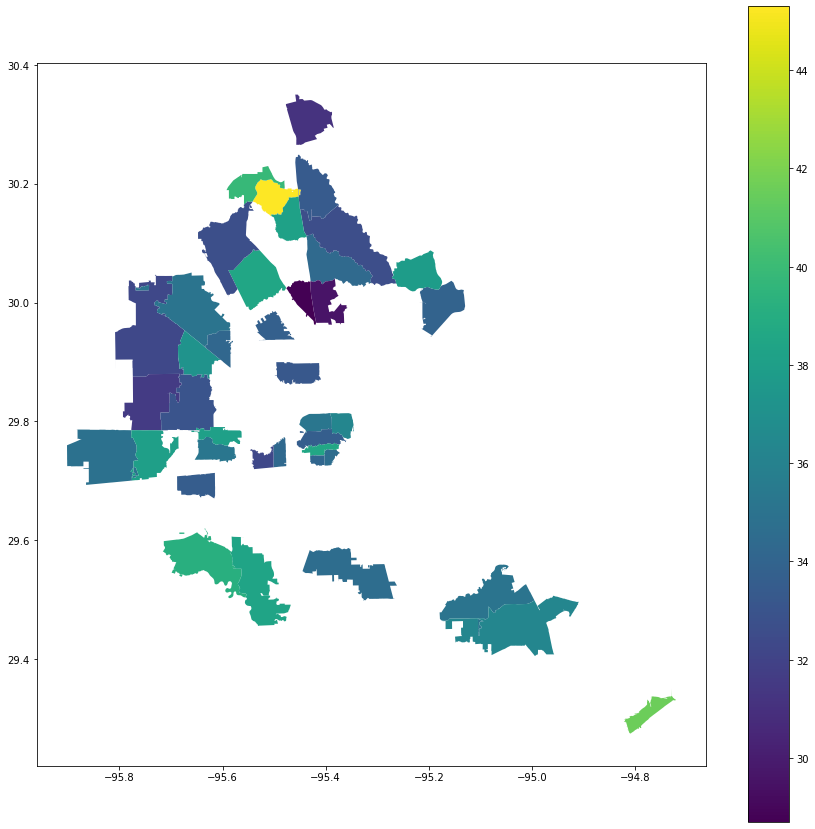

In [511]:
fig,ax = plt.subplots(figsize=(15,15))
houston.plot(ax=ax, zorder=2, legend=True, linewidth=0.05, column='median_age');

### begin prelim modeling 

In [512]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [513]:
x = df.copy()

In [514]:
x

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,median_income,income_per_capita,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,occupied_housing_units,vacant_housing_units_for_rent,median_year_structure_built,married_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,commuters_by_public_transportation,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year,Time,total_pop,male_pop_ratio,female_pop_ratio,white_pop_ratio,not_us_citizen_pop_ratio,black_pop_ratio,asian_pop_ratio,hispanic_pop_ratio,amerindian_pop_ratio,other_race_pop_ratio,pop_determined_poverty_status_ratio,children_ratio,employed_pop_ratio,unemployed_pop_ratio,pop_in_labor_force_ratio,armed_forces_ratio,City,State,zori_ssa,zori_ssa_diff,ZCTA5CE10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-01-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1390.0,NaN,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
1,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-02-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1387.0,329.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
2,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-03-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1384.0,319.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
3,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-04-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1381.0,310.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
4,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-05-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1379.0,302.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [515]:
x.loc[:,'zori_ssa_shift_back_1'] = x.loc[:,'zori_ssa'].shift(-1)

In [516]:
x = x.loc[~x.isna().any(axis = 1)]

In [517]:
x.isna().any().sum()

0

In [519]:
x

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,median_income,income_per_capita,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,occupied_housing_units,vacant_housing_units_for_rent,median_year_structure_built,married_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,commuters_by_public_transportation,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year,Time,total_pop,male_pop_ratio,female_pop_ratio,white_pop_ratio,not_us_citizen_pop_ratio,black_pop_ratio,asian_pop_ratio,hispanic_pop_ratio,amerindian_pop_ratio,other_race_pop_ratio,pop_determined_poverty_status_ratio,children_ratio,employed_pop_ratio,unemployed_pop_ratio,pop_in_labor_force_ratio,armed_forces_ratio,City,State,zori_ssa,zori_ssa_diff,ZCTA5CE10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,zori_ssa_shift_back_1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-02-01,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-02-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1387.0,329.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ...",1384.0
2014-03-01,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-03-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1384.0,319.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ...",1381.0
2014-04-01,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-04-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1381.0,310.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ...",1379.0
2014-05-01,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-05-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1379.0,302.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ...",1376.0
2014-06-01,77494,39636.0,39481.0,34.7,48223.0,10678.0,5343.0,10967.0,12793.0,130.0,87.0,131694.0,47019.0,78794.0,1899.0,0.3545,25638.0,1366.0,24787.0,100.0,2005.0,19015.0,456.0,66.0,9.0,27082.0,1159.0,24.5,21257.0,714.0,35822.0,1250.0,37072.0,0.0,2014,2014-06-01,79117.0,0.500980,0.499020,0.609515,0.134965,0.067533,0.138617,0.161697,0.001643,0.00110,0.995917,0.342303,0.452772,0.015799,0.468572,0.000000,Houston,TX,1376.0,293.0,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ...",1373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [518]:
x.loc[:,'Date'] = x.loc[:,'Time'].apply(lambda x: str(x)[:-9])

x = x.set_index('Date')

train = x.loc['2014-12-01':'2021-01-01',:]
test = x.loc['2021-02-01':,:]

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


KeyError: "Cannot get left slice bound for non-unique label: '2014-12-01'"

In [ ]:
x